<a href="https://colab.research.google.com/github/KapilL2212/GRIP-Sparks-Foundation-Sep-2023/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author-Kapil Lohia

The Sparks Foundation (GRIP) - Data science and Business Analytics

Task-1: Predict the percentage of an student based on number of study hours.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn import metrics

In [ ]:
# Reading data using link
dat = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(dat)
df.head(12)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


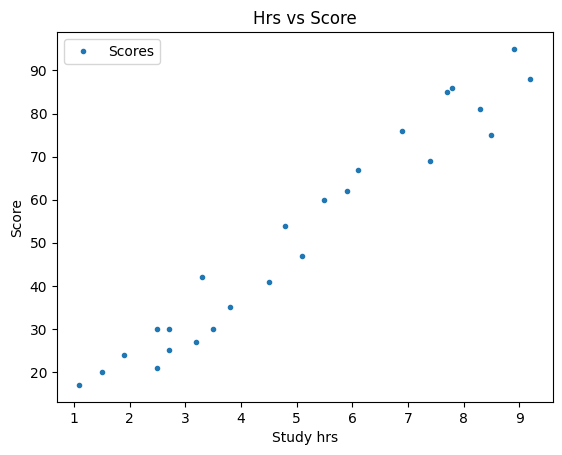

In [ ]:
#Plotting the scores
df.plot(x='Hours',y='Scores', style='.')
plt.title('Hrs vs Score')
plt.xlabel('Study hrs')
plt.ylabel('Score')
plt.show()

There is a linear relation between Score and Hrs.
Now we will preprocess data to put into our machine learning model.

In [ ]:
#assigning hours as input data(independent variable) and score as output data(dependent varible)
x= df.iloc[:,0]
y= df.iloc[:,1]

Training

In [ ]:
#Splitting the data into two sets 'training and testing'.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2,random_state=0)
regression = LinearRegression()
x_train = np.array([x_train])
x_train=x_train.reshape(-1,1)
regression.fit(x_train,y_train)

LinearRegression()

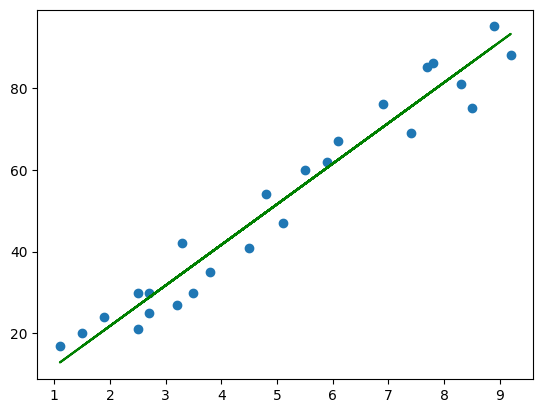

In [ ]:
var= regression.coef_*x+regression.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, var, color='green');
plt.show()

Testing

In [ ]:
pred=regression.predict(np.array(x_test).reshape(-1,1))
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing

In [ ]:
dframe= pd.DataFrame({'RealData':y_test, 'PredictedData':pred})
dframe

,RealData,PredictedData
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Testing score for 9.25 hrs of study.

In [ ]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
predictions=regression.predict(test)
print("Number of Hours Studied ={}".format(hours))
print("Predicted Score ={}".format(predictions[0]))

Number of Hours Studied =9.25
Predicted Score =93.69173248737539


Evaluating

In [ ]:
print('Mean Absolute Error:' ,
      metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9454906892105354

Conclusion

1.We have successfully created a Simple linear Regression model to predict score of the student given number of hours one studies.

2.We get Predicted Score as 93.69173248737539 when study hours are 9.25.

3.We get a very less Mean Absolute Error and Mean Squared Error.

4.r2 score of the model is 0.94549068921 which means model is accurate.